In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [4]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [39]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

a=1
xer = (a)/(2 * np.sqrt(3))

u_val1 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer)**2)
u_val2 = np.sqrt(((bf1[:,0]- 400)/(1000-400)*xer + xer)**2 )

u_ges = np.sqrt( (u_val1)**2 + (u_val2)**2 )
print(len(u_ges))

101


c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
c:\Users\jesie\anaconda3\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  

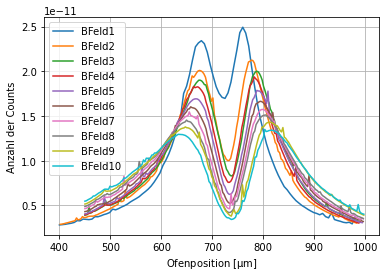

In [110]:
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m,b,x):
    return m*x+b

bcalibrated =[]
for  i in range(len(xcalib)):
    popt,cov = curve_fit(linear,xcalib[i],ycalib[i])
    bcalibrated.append(popt[1]*bfields[i][:,0]+popt[0])
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="BFeld"+str(i+1))
    plt.xlabel(r"Ofenposition [$\mathrm{\mu m}$]")
    plt.ylabel(r"Anzahl der Counts")
    plt.legend(loc=2)
    plt.grid(True)

In [73]:
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-np.abs(x-mu1)**2/sigma1)
        + b * np.exp(-np.abs(x-mu2)**2/sigma2)
    )

In [111]:
def fitdoublegaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[3]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[6]))
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.show()
    #plt.savefig("doublegauß.png")

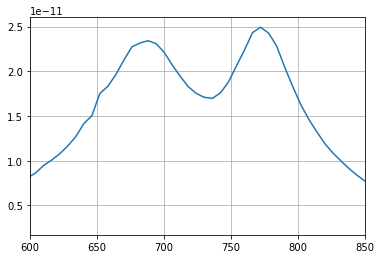

In [112]:
plt.plot(bf1[:,0],bf1[:,1])
plt.xlim(600,850)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

Peak1: 681.9385638960456 +/- Abweichung: 1.715508988192637e-11 ; Peak2: 780.5195065164045 +/- Abweichung: 4.326018279797823e-12


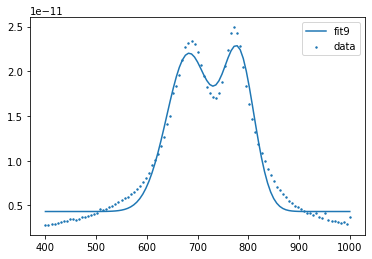

In [113]:
fitdoublegaussian(bf1, (2e-11, 685, 70, 
                          2e-11, 770, 40, 3e-12))

Peak1: 672.5398217912228 +/- Abweichung: 1.7155077924777857e-11 ; Peak2: 767.8351137044249 +/- Abweichung: 4.325993491485975e-12


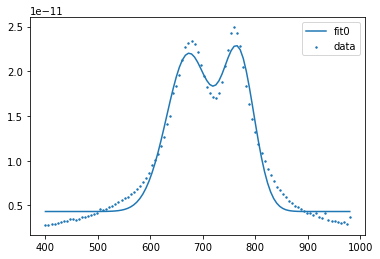

Peak1: 664.51605233356 +/- Abweichung: 1.511294048602141e-11 ; Peak2: 786.1272901711252 +/- Abweichung: 4.633483600115555e-12


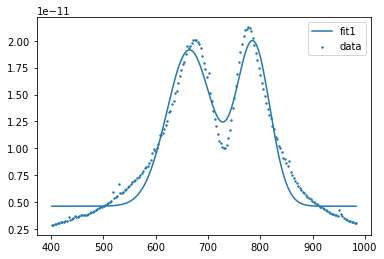

Peak1: 664.4799976810777 +/- Abweichung: 1.3903497342570289e-11 ; Peak2: 797.5840104312457 +/- Abweichung: 5.1916203565600046e-12


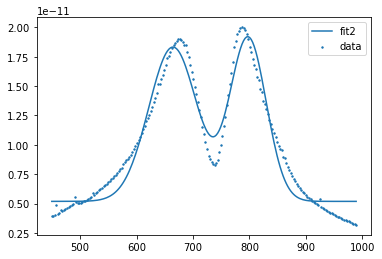

Peak1: 658.0395030075421 +/- Abweichung: 1.3405056722414916e-11 ; Peak2: 794.082968346437 +/- Abweichung: 5.035301677366791e-12


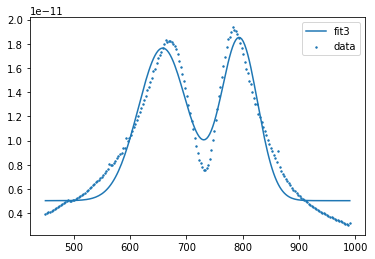

Peak1: 653.3579754379371 +/- Abweichung: 1.2395315291080121e-11 ; Peak2: 801.5123733223255 +/- Abweichung: 5.06831350630026e-12


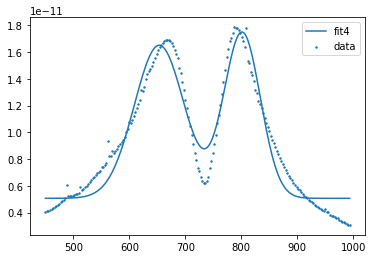

Peak1: 646.0492798845222 +/- Abweichung: 1.1348223150966278e-11 ; Peak2: 806.5394949920523 +/- Abweichung: 5.153534360673015e-12


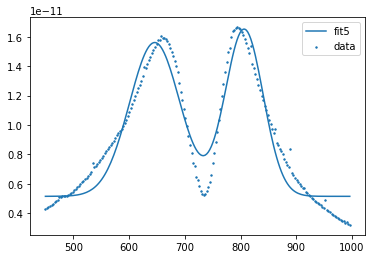

Peak1: 639.1995805145325 +/- Abweichung: 1.0412626134579883e-11 ; Peak2: 810.4883611368107 +/- Abweichung: 5.2601119135490785e-12


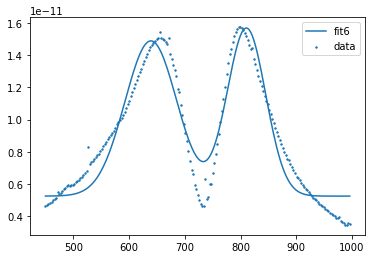

Peak1: 631.812696935494 +/- Abweichung: 9.820447404534355e-12 ; Peak2: 814.6889366751252 +/- Abweichung: 5.310700981625414e-12


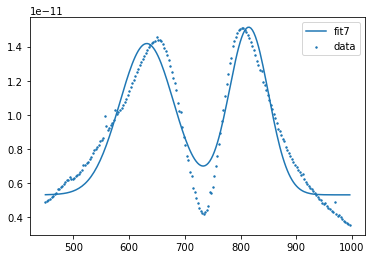

Peak1: 628.4229700496393 +/- Abweichung: 9.057177644768839e-12 ; Peak2: 826.3291805992594 +/- Abweichung: 5.449869222084419e-12


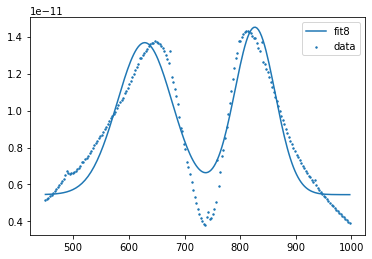

Peak1: 616.9044380861442 +/- Abweichung: 8.347557027890964e-12 ; Peak2: 830.4234899154595 +/- Abweichung: 5.267280043354701e-12


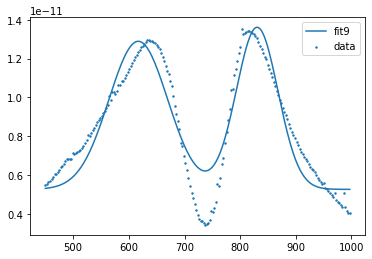

In [114]:
for i in range(len(bcalibrated)):
    test = np.column_stack((bcalibrated[i],bfields[i][:,1]))
    fitdoublegaussian(test, (2e-11, 685, 70, 
                          2e-11, 790, 40, 0e-12))

In [116]:
def supergaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,p1:float,
    b: float, mu2: float, sigma2: float,p2:float,
    y0: float): 
    return (
        y0
        + a * np.exp(-np.abs(x-mu1)**p1/sigma1)
        + b * np.exp(-np.abs(x-mu2)**p2/sigma2)
    )

In [121]:
def fitsupergaussian(array,p0):
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(supergaussian,x,y,p0=p0)
    print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[3]),";","Peak2: "+str(popt1[5]),"+/-","Abweichung: "+str(popt1[7]))
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,supergaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.show()
    #plt.savefig("doublegauß.png")

Peak1: 671.2019127626672 +/- Abweichung: 1.0341906829359024 ; Peak2: 763.509483647338 +/- Abweichung: 0.9799216431625002


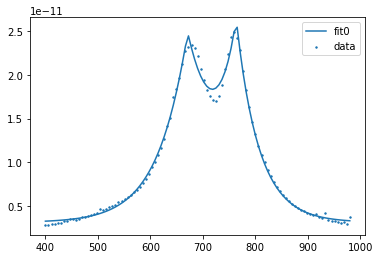

Peak1: 665.0962811155126 +/- Abweichung: 1.0523302576291054 ; Peak2: 785.5975783499737 +/- Abweichung: 1.2036436346556507


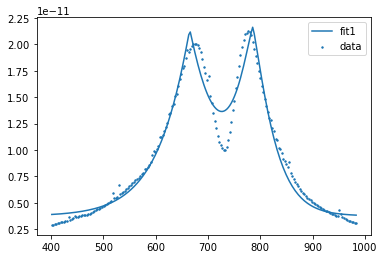

Peak1: 669.117347422536 +/- Abweichung: 1.1558492154630144 ; Peak2: 801.950890824464 +/- Abweichung: 2.6719588272771855


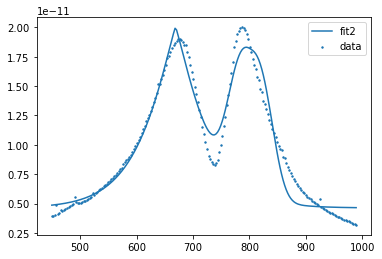

Peak1: 662.6122318757581 +/- Abweichung: 1.1293424009178366 ; Peak2: 798.5198438136612 +/- Abweichung: 2.730550937753091


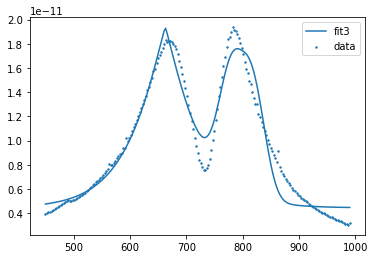

Peak1: 656.2031446937314 +/- Abweichung: 1.3839258882316432 ; Peak2: 804.8237897942072 +/- Abweichung: 2.673738063485426


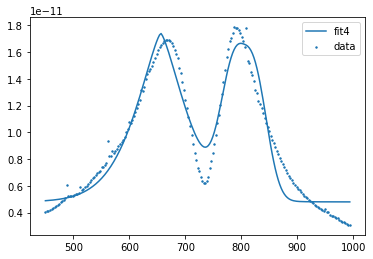

Peak1: 647.3328848723683 +/- Abweichung: 1.7528965125519183 ; Peak2: 808.4388833822334 +/- Abweichung: 2.8656508400643537


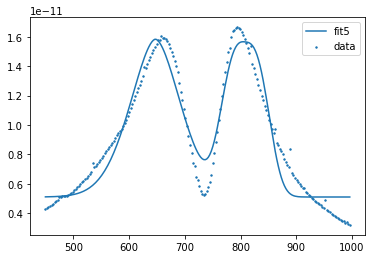

Peak1: 639.0920101706992 +/- Abweichung: 2.2246576678718655 ; Peak2: 811.2489913578315 +/- Abweichung: 2.779445469215954


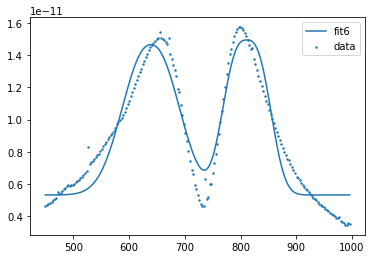

Peak1: 629.9782701349538 +/- Abweichung: 2.9448471915613696 ; Peak2: 815.1506576502146 +/- Abweichung: 2.8872917056684373


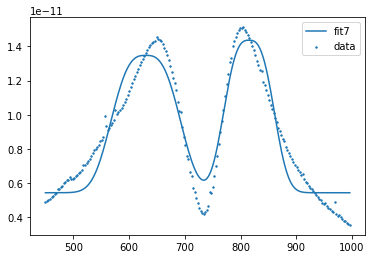

Peak1: 626.5909784017156 +/- Abweichung: 3.2273144343565683 ; Peak2: 826.8958123087982 +/- Abweichung: 3.0466852602249386


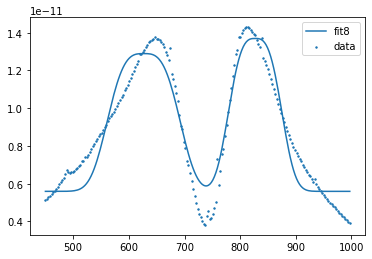

Peak1: 614.7234724598925 +/- Abweichung: 3.5346808454098366 ; Peak2: 831.3270817934697 +/- Abweichung: 3.2437259821135167


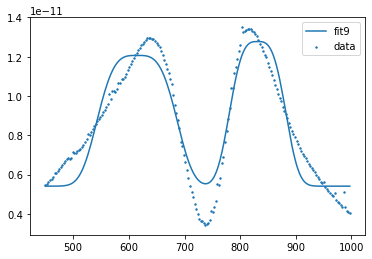

In [122]:
for i in range(len(bcalibrated)):
    test = np.column_stack((bcalibrated[i],bfields[i][:,1]))
    fitsupergaussian(test, (2e-11, 685, 70,1, 
                          2e-11, 790, 40,1, 0e-12))